In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [3]:
#Stage 1 : Initialization Stage
#Creating dataFrame structure

In [4]:
iris = datasets.load_iris()
Irisdf = pd.DataFrame(iris.data,columns=iris.feature_names)
Irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# Taking only Sepal length and Sepal width for further use

Dataframe = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'm': iris.data[:,2],
    'n': iris.data[:,3],
    'cluster' : iris.target
})

In [9]:
Centroids = {}
for i in range(3):
    result_list = []
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['x'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['y'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['m'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['n'].mean())
    
    Centroids[i] = result_list

In [10]:
#Plotting Points for sepals

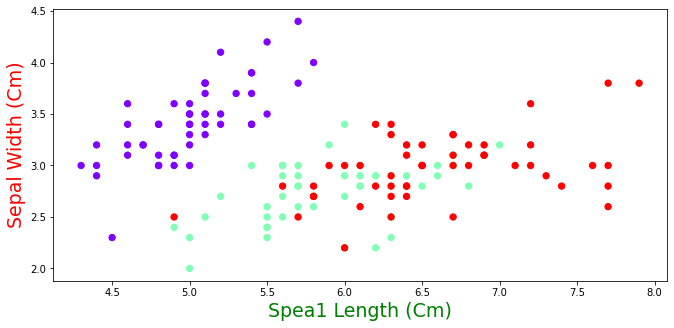

In [11]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], c=iris.target, cmap='rainbow',  s=40 )
plt.xlabel('Spea1 Length (Cm)', fontsize=19, color = 'green')
plt.ylabel('Sepal Width (Cm)', fontsize=19, color = 'red')
plt.show()

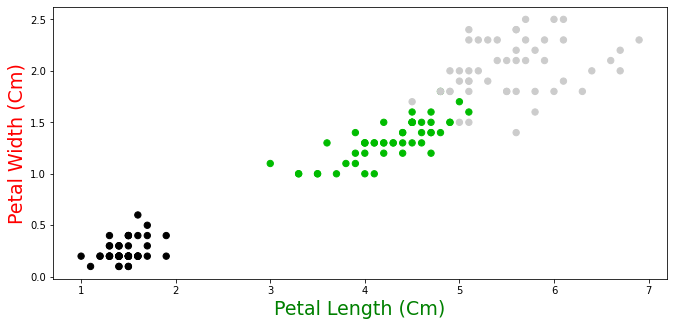

In [12]:
#Plotting points for petal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], c=iris.target, cmap='nipy_spectral',  s=40 )
plt.xlabel('Petal Length (Cm)', fontsize=19, color = 'green')
plt.ylabel('Petal Width (Cm)', fontsize=19, color = 'red')
plt.show()

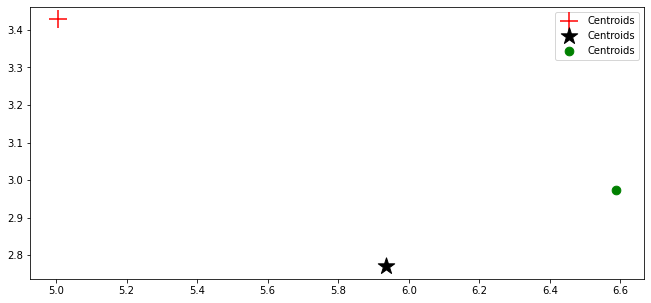

In [13]:
#Defining colors and ploting centroids for all clusters with respect to Sepal

fig = plt.figure(figsize=(11, 5))
colmap = {0: 'red', 1: 'black', 2: 'green'}
markers = {0: '+', 1: '*', 2: '.'}
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

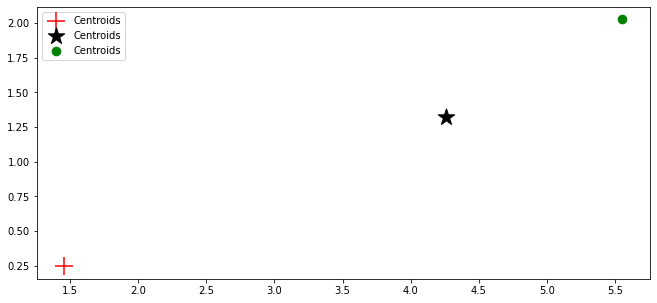

In [14]:
#Defining colors and ploting centroids for all clusters with respect to Petal
fig = plt.figure(figsize=(11, 5))
colmap = {0: 'red', 1: 'black', 2: 'green'}
markers = {0: '+', 1: '*', 2: '.'}
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

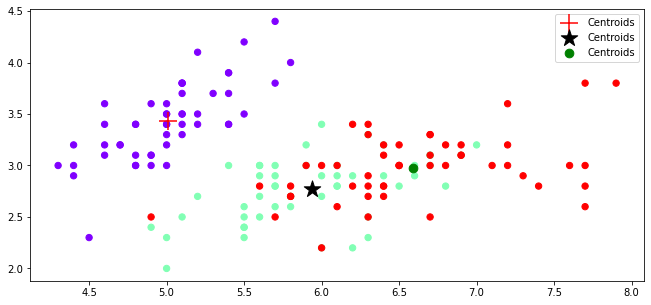

In [15]:
#Showing complete graph for Sepal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], c=iris.target, cmap='rainbow',  s=40 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

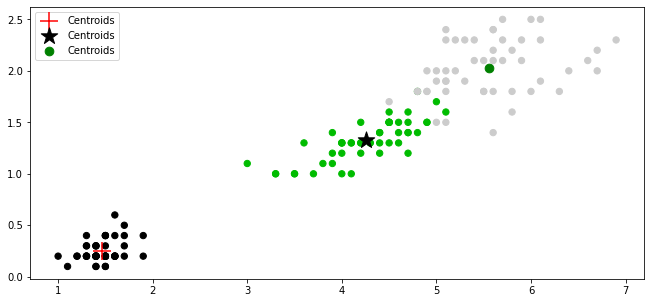

In [16]:
#Showing complete graph for Petal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], c=iris.target, cmap='nipy_spectral',  s=40 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

In [17]:
#Stage 2: Assignment Stage
#Assignment function : Calculating distance and updating dataFrame

def assignment(Dataframe, Centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        Dataframe['distance_from_{}'.format(i)] = (
            np.sqrt(
                (Dataframe['x'] - Centroids[i][0]) ** 2
                + (Dataframe['y'] - Centroids[i][1]) ** 2
               +(Dataframe['x'] - Centroids[i][0]) ** 2
                + (Dataframe['y'] - Centroids[i][1]) ** 2
               
            )
        )
    Centroid_distance_cols = ['distance_from_{}'.format(i) for i in Centroids.keys()]
    Dataframe['closest'] = Dataframe.loc[:, Centroid_distance_cols].idxmin(axis=1)
    Dataframe['closest'] = Dataframe['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    Dataframe['color'] = Dataframe['closest'].map(lambda x: colmap[x])
    return Dataframe

Dataframe = assignment(Dataframe, Centroids)

In [18]:

Dataframe

,x,y,m,n,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,1.4,0.2,0,0.167451,1.569583,2.231959,0,red
1,4.9,3.0,1.4,0.2,0,0.623570,1.500797,2.387476,0,red
2,4.7,3.2,1.3,0.2,0,0.539667,1.850727,2.689097,0,red
3,4.6,3.1,1.5,0.2,0,0.738133,1.946174,2.817098,0,red
4,5.0,3.6,1.4,0.2,0,0.243393,1.769178,2.413968,0,red
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.470959,1.128358,0.162604,2,green
146,6.3,2.5,5.0,1.9,2,2.251941,0.640931,0.784372,1,black
147,6.5,3.0,5.2,2.0,2,2.197826,0.861390,0.129769,2,green
148,6.2,3.4,5.4,2.3,2,1.689035,0.966019,0.814886,2,green


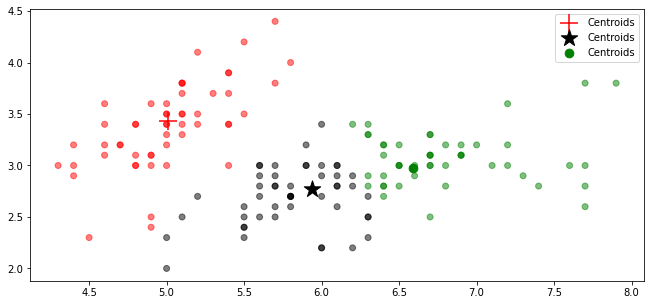

In [19]:
#Visualisation of clusters with colors Sepal:¶

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.5 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

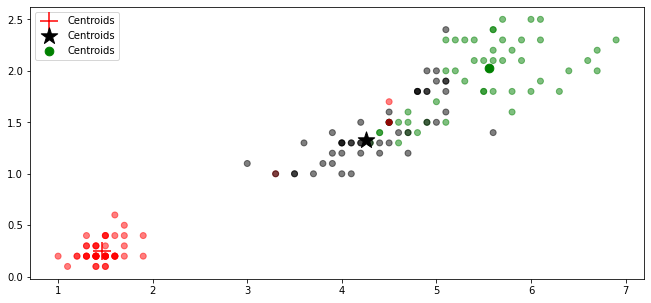

In [20]:
#Visualization of cluster with color for Petal¶

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.5 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

In [21]:
#Stage 3: Update Stage
#Update function : Updating the centroids

def update(k):
    for i in range(3):
        Centroids[i][0] = np.mean(Dataframe[Dataframe['closest'] == i]['x'])
        Centroids[i][1] = np.mean(Dataframe[Dataframe['closest'] == i]['y'])
        Centroids[i][2] = np.mean(Dataframe[Dataframe['closest'] == i]['m'])
        Centroids[i][3] = np.mean(Dataframe[Dataframe['closest'] == i]['n'])
    return k

In [22]:

Centroids = update(Centroids)
Centroids

{0: [5.00943396226415,
  3.383018867924529,
  1.6113207547169812,
  0.31132075471698106],
 1: [5.806122448979591,
  2.693877551020408,
  4.385714285714285,
  1.4346938775510203],
 2: [6.802083333333331,
  3.0687499999999996,
  5.487499999999997,
  1.9395833333333332]}

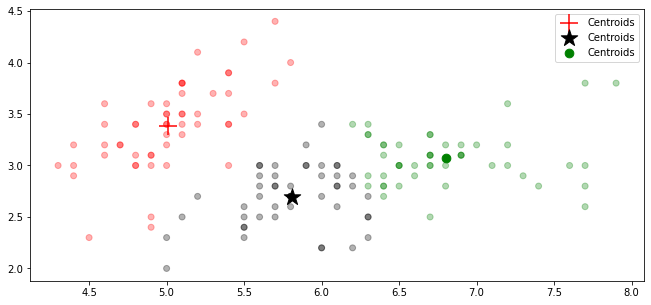

In [24]:

#Visualising the graph with updated centroids
#For Sepal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.3 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

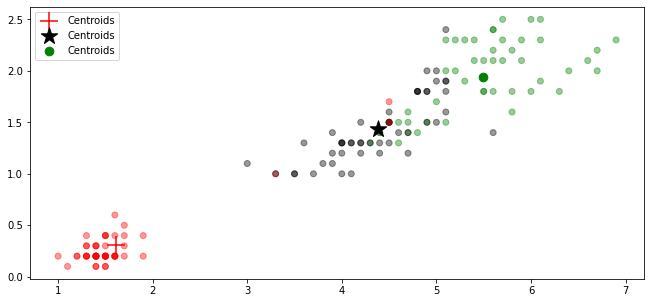

In [25]:
#For Petal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.4 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

In [26]:

#Repeat assignment stage to to ressign the points with clusters

Dataframe = assignment(Dataframe, Centroids)

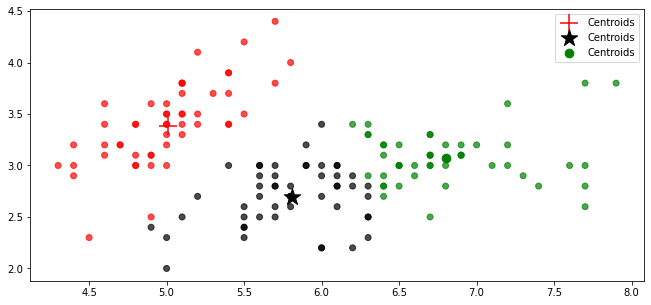

In [27]:
#Visualising the updated graph
#for Sepal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.7 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

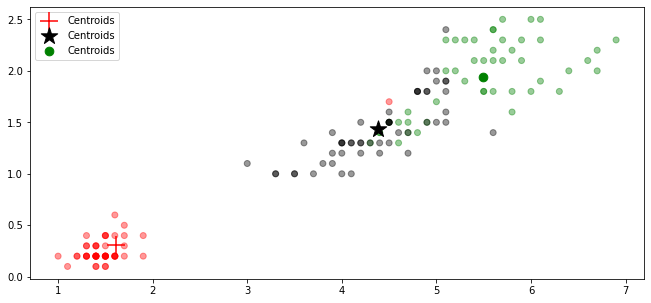

In [28]:
#for Petal

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.4 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

In [29]:
#Continuing until all assigned clusters don't change any more

while True:
    closest_Centroids = Dataframe['closest'].copy(deep=True)
    Centroids = update(Centroids)
    Dataframe = assignment(Dataframe, Centroids)
    if closest_Centroids.equals(Dataframe['closest']):
        break

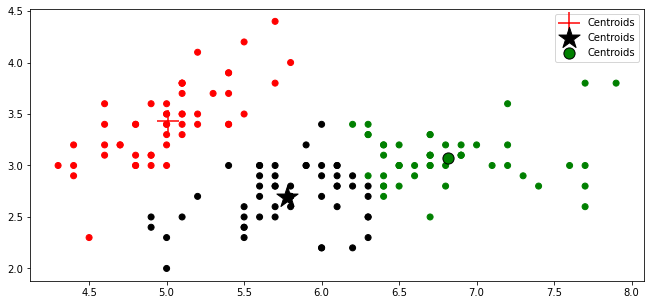

In [30]:
#Final Result :
#with respect to Sepal Length and Sepal Width

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'] )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=500, label= 'Centroids', edgecolor='k' )
plt.legend()

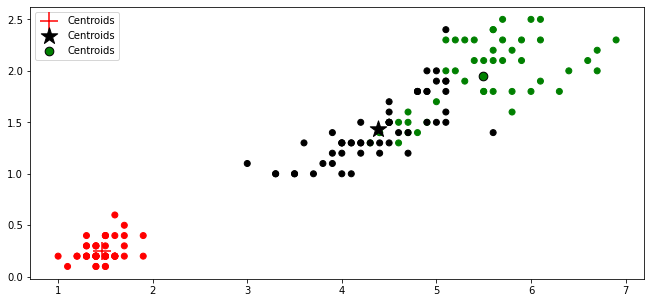

In [31]:
#Final Result :¶
#with respect to Petal Length and Petal Width

fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'])
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids', edgecolor='k')
plt.legend()